# 3. Graph extentions

Import Dependencies & Load dataset

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

Grafos dirigidos; bases de grafos dirigidos; conectividad en grafos dirigidos.
Grafos ponderados.

## 3.1. Directed graphs (Digraph)

### 3.1.1. Definition

**Definición**: Un grafo dirigido o digrafo $D$ consiste en una collección de vertices $V$, y una collección de arcos $A$, denotado como $D = (V,A)$. Cada arco $a = \langle u, v \rangle$ conecta el vértice $u \in V$ a otro vértice $v$ (no necesariamente distinto). El vértice $u$ se denomina *origen* de $a$ y $v$ se denomina *destino*.

**Example:** 

A DiGraph $D$ and its complement $\overline{D}$.

Text(0.5, 1.0, '$\\overline{D}$')

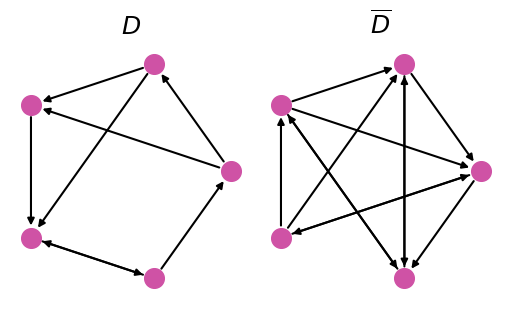

In [ ]:
node_labels = [0,1,2,3,4]
edge_labels = [(0, 1), (0,2), (1,2), (2,3), (4,3), (3,4), (1,3), (4,0)]

fig, axs = plt.subplots(figsize=(5,3), facecolor='w', nrows=1, ncols=2, constrained_layout=True)

D = nx.DiGraph()
D.add_nodes_from(node_labels)
D.add_edges_from(edge_labels)
pos = nx.layout.circular_layout(D)
nx.draw_networkx_nodes(D, pos, node_color="#cf52a5", linewidths=1, ax=axs[0], node_size=200)
nx.draw_networkx_edges(D, pos, width=1.5, ax=axs[0])
axs[0].axis('off')

D_complement = nx.complement(D)
pos = nx.layout.circular_layout(D_complement)
nx.draw_networkx_nodes(D_complement, pos, node_color="#cf52a5", linewidths=1, ax=axs[1], node_size=200)
nx.draw_networkx_edges(D_complement, pos, width=1.5, ax=axs[1]) #52a5cf
axs[1].axis('off')

axs[0].set_title(r"$D$", fontsize=18)
axs[1].set_title(r"$\overline{D}$", fontsize=18)


### 3.1.2. Connectivity in DiGraphs

**Definición**: Considere un digrafo $D$. Un camino-($v_0, v_k$) dirigido en $D$ es una sequencia alternada $[v_0, a_0, v_1, a_1, \dots, v_{k-1}, a_{k-1}, v_k]$ de vértices y arcos de $D$ con $\langle \overrightarrow{v_i, v_{i+1}} \rangle$. Un *sendero dirigido* es una caminata dirigida en la que todos los arcos son distintos; un *camino dirigido* es un camino dirigido en el que todos los vértices también son distintos.

## 3.2. Weighted graphs

**Definición**: Un grafo ponderado $G$ es un grafo donde cada  enlace $e$ tiene asociado un número real $w(e)$ llamado *peso (weight)*. Para un subgrafo $H \subseteq G$, el peso de $H$ es simplemente la suma de pesos de sus enlaces: $w(H) = \sum_{e \in E(H)} w(e)$.

**Example:**

In [ ]:
node_labels = [0,1,2,3,4]
edge_labels = [(0, 1), (0,2), (1,2), (2,3), (3,4), (1,3)]
weight = [1, 1, 2, 2, 4, 2]
weighted_edges = [(edge_labels[i][0], edge_labels[i][1], weight[i]) for i in range(len(edge_labels))]

In [ ]:
W = nx.Graph()
W.add_nodes_from(node_labels)
W.add_weighted_edges_from(weighted_edges, weight='weight')

Text(0.5, 1.0, '$W$')

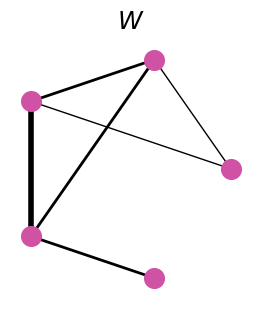

In [ ]:
fig, axs = plt.subplots(figsize=(2.5,3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
pos = nx.layout.circular_layout(W)
nx.draw_networkx_nodes(W, pos, node_color="#cf52a5", linewidths=1, ax=axs, node_size=200)
nx.draw_networkx_edges(W, pos, width=weight, ax=axs)
axs.axis('off')
axs.set_title(r"$W$", fontsize=18)

In [ ]:
W.edges.data("weight")

EdgeDataView([(0, 1, 1), (0, 2, 1), (1, 2, 2), (1, 3, 2), (2, 3, 2), (3, 4, 4)])

In [ ]:
WA = nx.adjacency_matrix(W, weight='weight').todense()
WA

array([[0, 1, 1, 0, 0],
       [1, 0, 2, 2, 0],
       [1, 2, 0, 2, 0],
       [0, 2, 2, 0, 4],
       [0, 0, 0, 4, 0]])

<ipython-input-20-d4976c0f0b21>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_ = plt.cm.get_cmap('Greys_r')#, 5)


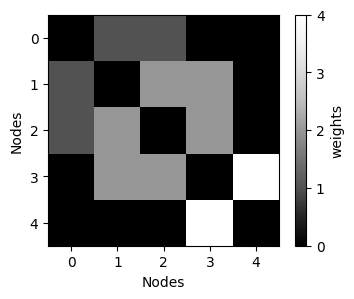

In [ ]:
fig, axs = plt.subplots(figsize=(4,3), facecolor='w', nrows=1, ncols=1)
cmap_ = plt.cm.get_cmap('Greys_r')#, 5)
#labels = np.arange(0, 4+1, 1)
im = axs.imshow(WA, cmap=cmap_)#, vmin=0, vmax=4)
cbar = plt.colorbar(im, ax=axs, ticks=[0,1,2,3,4])
cbar.set_label("weights")
axs.set_xlabel("Nodes"); axs.set_ylabel("Nodes");
#loc = labels - 0.5
#cbar.set_ticks(loc)
#cbar.set_ticklabels(labels)

## 3.3. Weighted digraphs

**Definición**: Un grafo ponderado dirigido $D$ consiste en una collección de vertices $V$, una collección de enlaces $E$ y pesos $W$, denotado como $D = (V,E,W)$. Cada enalce $e = \langle u, v \rangle$ conecta el vértice $u \in V$ a otro vértice $v$ (no necesariamente distinto). El vértice $u$ se denomina *origen* de $e$ y $v$ se denomina *destino*.

**Example**

In [ ]:
node_labels = [0,1,2,3,4]
edge_labels = [(0, 1), (0,2), (1,2), (2,3), (4,3), (3,4), (1,3), (4,0)]
weight = [1, 1, 2, 2, 4, 2, 1, 2]
weighted_edges = [(edge_labels[i][0], edge_labels[i][1], weight[i]) for i in range(len(edge_labels))]

In [ ]:
WD = nx.DiGraph()
WD.add_nodes_from(node_labels)
WD.add_weighted_edges_from(weighted_edges, weight='weight')

Text(0.5, 1.0, '$WD$')

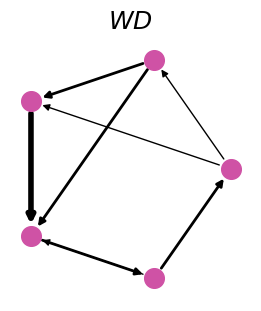

In [ ]:
fig, axs = plt.subplots(figsize=(2.5,3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
pos = nx.layout.circular_layout(WD)
nx.draw_networkx_nodes(WD, pos, node_color="#cf52a5", linewidths=1, ax=axs, node_size=200)
nx.draw_networkx_edges(WD, pos, width=weight, ax=axs)
axs.axis('off')
axs.set_title(r"$WD$", fontsize=18)

## 3.4. Bipartite graphs `[TODO]`

## References `[TO ADD]`

---